<a href="https://colab.research.google.com/github/idhanwal/Wine-Quality-Prediction/blob/main/Wine_quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Wine Quality Prediction***

# Importing Libraries

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Importing the Dataset

In [234]:
dataset = pd.read_csv("winequality-white-.csv")

dataset.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [235]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [236]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [237]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [238]:
dataset["quality"].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


# Data Visualisation

## Scatter Plot

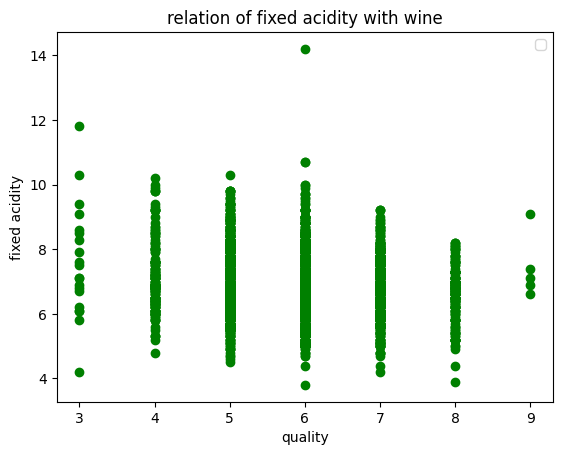

In [239]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(dataset['quality'], dataset['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

## Bar Plot

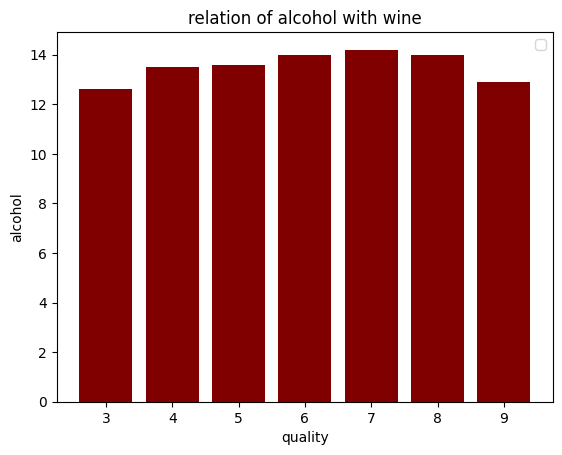

In [240]:

# checking the variation of alcohol in the different qualities of wine

plt.bar(dataset['quality'], dataset['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

<ipython-input-241-3ca7a433b078>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  sns.barplot(x = 'quality', y = 'citric acid', data = dataset, hue="quality", color='white')


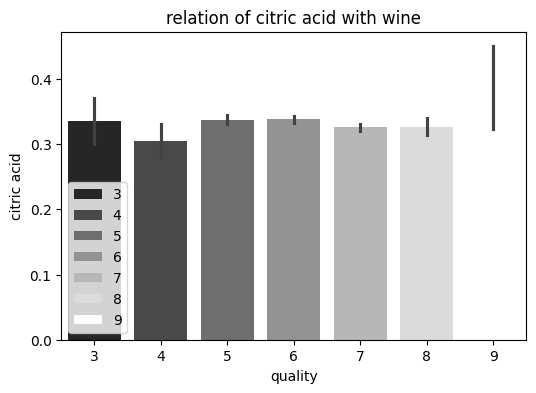

In [241]:
# Composition of citric acid remains same among different qualities of white wine
import seaborn as sns

fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'citric acid', data = dataset, hue="quality", color='white')
plt.title('relation of citric acid with wine')
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.legend()
plt.show()

<ipython-input-242-1b91072dec59>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(x = 'quality', y = 'residual sugar', data = dataset, hue="quality", color='blue')


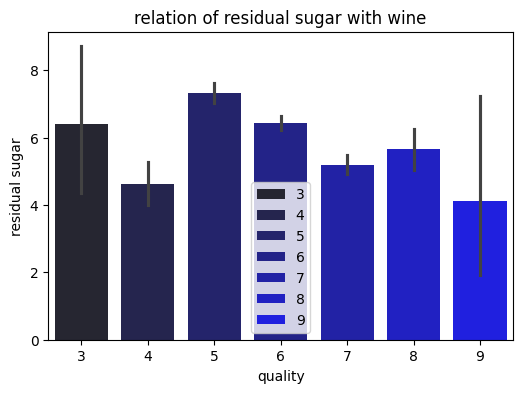

In [242]:
# Relation of sugar with quality of white wine
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'residual sugar', data = dataset, hue="quality", color='blue')
plt.title('relation of residual sugar with wine')
plt.xlabel('quality')
plt.ylabel('residual sugar')
plt.legend()
plt.show()

<ipython-input-243-aad9eb28094a>:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:teal'` for the same effect.

  sns.barplot(x = 'quality', y = 'chlorides', data = dataset, hue="quality", color='teal')


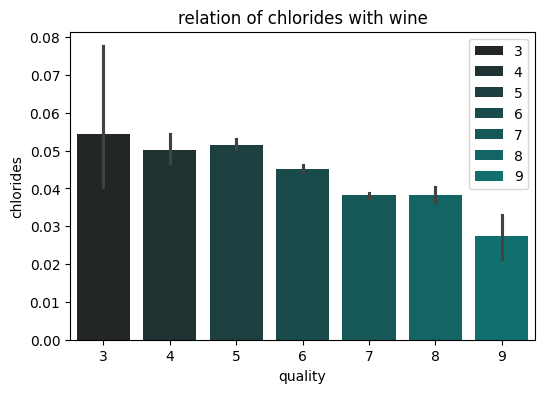

In [243]:
#Composition of chloride follows a downward trend as we go higher in the quality of the wine

fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'chlorides', data = dataset, hue="quality", color='teal')
plt.title('relation of chlorides with wine')
plt.xlabel('quality')
plt.ylabel('chlorides')
plt.legend()
plt.show()

<ipython-input-244-76442a3e709e>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = dataset, hue="quality", color='green')


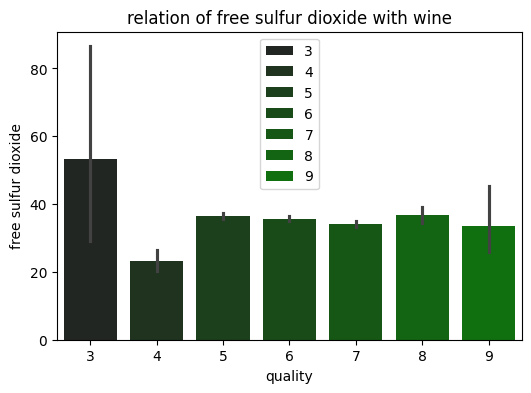

In [244]:
# Free sulphur dioxide is weakly corelated entity with quality of wine
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = dataset, hue="quality", color='green')
plt.title('relation of free sulfur dioxide with wine')
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')
plt.legend()
plt.show()


<ipython-input-245-03ec274bcb23>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = dataset, hue="quality", color='green')


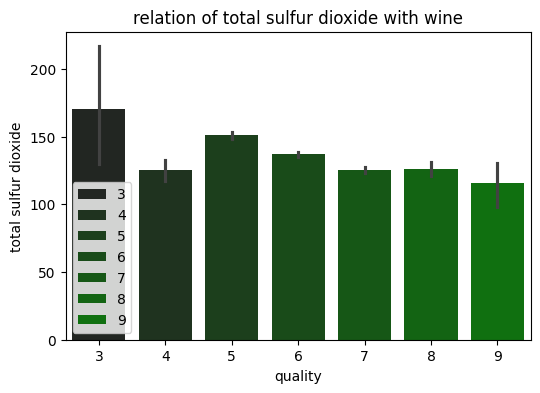

In [245]:
# Composition of total sulfur dioxide follows a downward trend as we go higher in the quality of the wine
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = dataset, hue="quality", color='green')
plt.title('relation of total sulfur dioxide with wine')
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')
plt.legend()
plt.show()


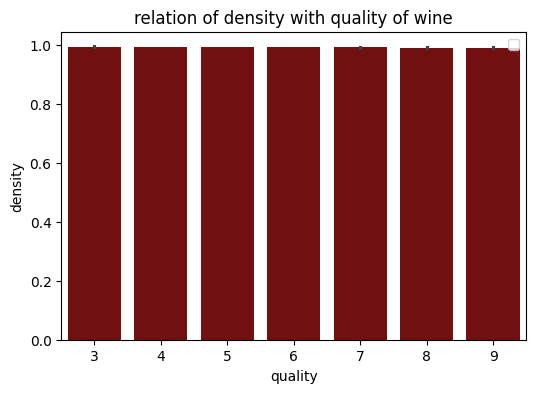

In [246]:
# Free sulphur dioxide is weakly corelated entity with quality of wine
fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'density', data = dataset, color="maroon")
plt.title('relation of density with quality of wine')
plt.xlabel('quality')
plt.ylabel('density')
plt.legend()
plt.show()

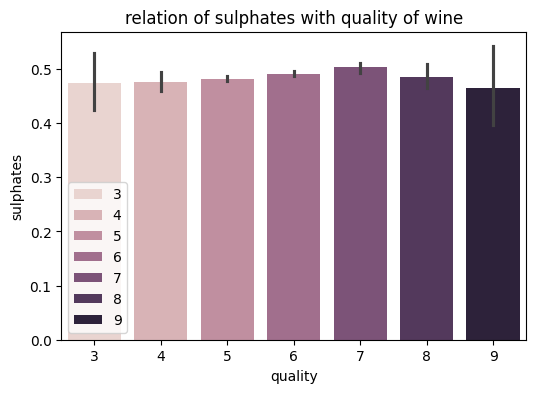

In [247]:

#Sulphates level goes higher with the quality of wine

fig = plt.figure(figsize = (6,4))
sns.barplot(x = 'quality', y = 'sulphates', data = dataset, hue="quality")
plt.title('relation of sulphates with quality of wine')
plt.xlabel('quality')
plt.ylabel('sulphates')
plt.legend()
plt.show()


<Axes: >

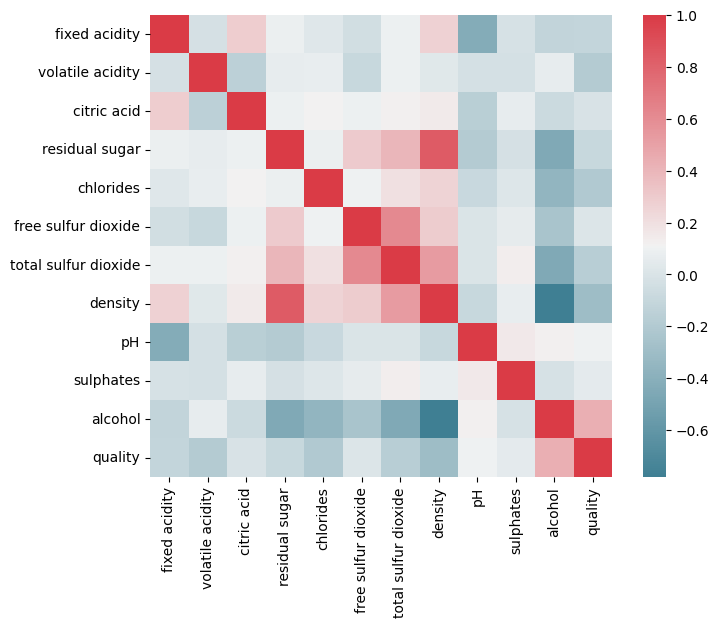

In [248]:
f, ax = plt.subplots(figsize=(8, 6))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

***Key Observations from the Heatmap:***

1. **Strong Positive Correlations:**

* **Alcohol and Quality**: *A strong positive correlation suggests
that wines with higher alcohol content tend to be rated higher in quality.*
* **Volatile Acidity and Quality**: *A strong negative correlation indicates that wines with higher volatile acidity are generally rated lower in quality.*
2. **Moderate Positive Correlations:**

* **Residual Sugar and Density**: *Sugary wines tend to be denser.*
* **Free Sulfur Dioxide and Total Sulfur Dioxide**: These two variables are closely related, indicating that wines with higher levels of one tend to have higher levels of the other.
3. **Moderate Negative Correlations:**

* Density and pH: As density increases, pH tends to decrease.
* Chlorides and Quality: Wines with higher chloride levels tend to be rated lower in quality.
4. **Insights for Winemakers and Consumers:**

* Alcohol Content: Increasing alcohol content can potentially improve wine quality, but it's essential to balance it with other factors.
* Volatile Acidity: Reducing volatile acidity can significantly enhance wine quality.
* Residual Sugar and Density: While these variables are correlated, they should be carefully controlled to achieve the desired wine style.
* Sulfur Dioxide: The levels of free and total sulfur dioxide should be monitored to ensure wine stability without negatively impacting flavor.
* Chlorides: Minimizing chloride levels can contribute to higher quality wines.




# Data Preprocessing

### Mapping quality of wine

In [249]:
dataset['quality'] = dataset['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good', 9: 'good'})

In [250]:
dataset['quality'].value_counts()

,count
quality,
good,3258
bad,1640


### Label Encoding

In [251]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['quality'] = le.fit_transform(dataset['quality'])
dataset['quality'].value_counts()

,count
quality,
1,3258
0,1640


### Dividing Dataset into Dependent and Independent values

In [252]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# determining the shape of x and y.
print(X.shape)
print(y.shape)

(4898, 11)
(4898,)


### Dividing the dataset in training and testing set

In [253]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3673, 11)
(1225, 11)
(3673,)
(1225,)


### Standard Scaling

In [254]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

# Modeling

## Logistic Regression

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV, cross_val_score

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# predicting the results for the test set
y_pred = classifier.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", classifier.score(X_train, y_train))
print("Testing accuracy :", classifier.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Training accuracy : 0.7481622651783283
Testing accuracy : 0.7444897959183674
              precision    recall  f1-score   support

           0       0.69      0.48      0.57       427
           1       0.76      0.88      0.82       798

    accuracy                           0.74      1225
   macro avg       0.73      0.68      0.69      1225
weighted avg       0.74      0.74      0.73      1225

[[207 220]
 [ 93 705]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 74.49 %
Standard Deviation: 1.66 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

## Stochastic Gradient Descent Classifier

In [256]:
from sklearn.linear_model import SGDClassifier

# creating the model
classifier = SGDClassifier(penalty=None)
classifier.fit(X_train, y_train)

# predicting the values for the test set
y_pred = classifier.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", classifier.score(X_train, y_train))
print("Testing accuracy :", classifier.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Training accuracy : 0.697794718213994
Testing accuracy : 0.6783673469387755
              precision    recall  f1-score   support

           0       0.53      0.65      0.58       427
           1       0.79      0.69      0.74       798

    accuracy                           0.68      1225
   macro avg       0.66      0.67      0.66      1225
weighted avg       0.70      0.68      0.68      1225

[[277 150]
 [244 554]]
Accuracy: 66.84 %
Standard Deviation: 4.73 %


## Support Vector Machine

In [257]:
from sklearn.svm import SVC

# creating the model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# predicting the values for the test set
y_pred = classifier.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", classifier.score(X_train, y_train))
print("Testing accuracy :", classifier.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Training accuracy : 0.7514293493057447
Testing accuracy : 0.7534693877551021
              precision    recall  f1-score   support

           0       0.71      0.49      0.58       427
           1       0.77      0.89      0.83       798

    accuracy                           0.75      1225
   macro avg       0.74      0.69      0.70      1225
weighted avg       0.75      0.75      0.74      1225

[[209 218]
 [ 84 714]]
Accuracy: 75.14 %
Standard Deviation: 2.00 %


## Random Forest

In [258]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# predicting the values for the test set
y_pred = classifier.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", classifier.score(X_train, y_train))
print("Testing accuracy :", classifier.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Training accuracy : 0.9904710046283692
Testing accuracy : 0.8122448979591836
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       427
           1       0.84      0.87      0.86       798

    accuracy                           0.81      1225
   macro avg       0.80      0.79      0.79      1225
weighted avg       0.81      0.81      0.81      1225

[[299 128]
 [102 696]]
Accuracy: 81.30 %
Standard Deviation: 2.00 %


## Decision Trees

In [259]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# predicting the values for the test set
y_pred = classifier.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", classifier.score(X_train, y_train))
print("Testing accuracy :", classifier.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Training accuracy : 1.0
Testing accuracy : 0.7665306122448979
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       427
           1       0.81      0.83      0.82       798

    accuracy                           0.77      1225
   macro avg       0.74      0.74      0.74      1225
weighted avg       0.76      0.77      0.77      1225

[[276 151]
 [135 663]]
Accuracy: 77.54 %
Standard Deviation: 2.54 %


## Multi Layer Perceptron

In [260]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)
classifier.fit(x_train, y_train)
# predicting the values for the test set
y_pred = classifier.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", classifier.score(X_train, y_train))
print("Testing accuracy :", classifier.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Training accuracy : 0.6697522461203376
Testing accuracy : 0.6530612244897959
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       427
           1       0.65      1.00      0.79       798

    accuracy                           0.65      1225
   macro avg       0.83      0.50      0.40      1225
weighted avg       0.77      0.65      0.52      1225

[[  2 425]
 [  0 798]]
Accuracy: 70.27 %
Standard Deviation: 1.25 %


## Artificial Neural Network Classification

In [261]:
# Initializing the ANN
ann = tf.keras.models.Sequential()
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
ann.fit(X_train.astype('float32'), y_train.astype('float32'), batch_size = 32, epochs = 100)

# Predicting the Test set results
y_pred = ann.predict(X_test.astype('float32'))
y_pred = (y_pred > 0.5)

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

# Computing the accuracy with k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6570 - loss: 16.3066
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5671 - loss: 0.7931
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6207 - loss: 0.7014
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6445 - loss: 0.6399
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6515 - loss: 0.6193
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6885 - loss: 0.5834
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6650 - loss: 0.5924
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6593 - loss: 0.5946
Epoch 9/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6543 - loss: 0.5847
Epoch 10/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6703 - loss: 0.5735
Epoch 11/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6826 - loss: 0.5802
Epoch 12/100
115/115 ━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 71.52 %
Standard Deviation: 1.99 %
